In [1]:
import numpy as np
from ROOT import TFile
from PyISR import kernelKuraevFadin, convolutionKuraevFadin
import matplotlib
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.sans-serif'] = ['Tahoma', 'DejaVu Sans',
                                          'Lucida Grande', 'Verdana']

Welcome to JupyROOT 6.24/02


In [2]:
%matplotlib inline

In [3]:
vx = np.linspace(1.e-9, 0.8, 10000)
s = 1.
vy = np.vectorize(lambda x: kernelKuraevFadin(x, s))(vx)

Text(0, 1, '$F(x, s=1\\;{\\rm GeV}^2)$')

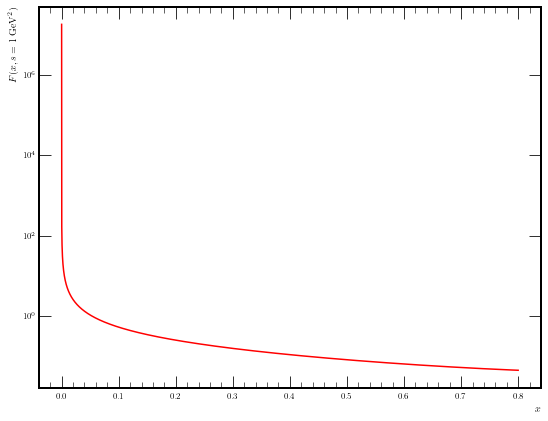

In [4]:
f, ax = plt.subplots(figsize=(9, 7))
ax.plot(vx, vy, 'r-', zorder=0)
ax.set_yscale('log')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$F(x, s=1\;{\rm GeV}^2)$')

In [5]:
fl = TFile.Open('data/bcs_fit_etapipi.root', 'read')
rfcn = fl.Get('f_bcs')
s_t = 0.827
vecm = np.linspace(1.18, 2., 1000)
fbcs = lambda ecm: rfcn.Eval(ecm)
vbcs = np.vectorize(fbcs)(vecm)
vvcs = np.vectorize(lambda ecm: convolutionKuraevFadin(ecm, fbcs, 0, 1 - s_t / ecm / ecm))(vecm)
fl.Close()

Text(0, 1, 'cross section (nb)')

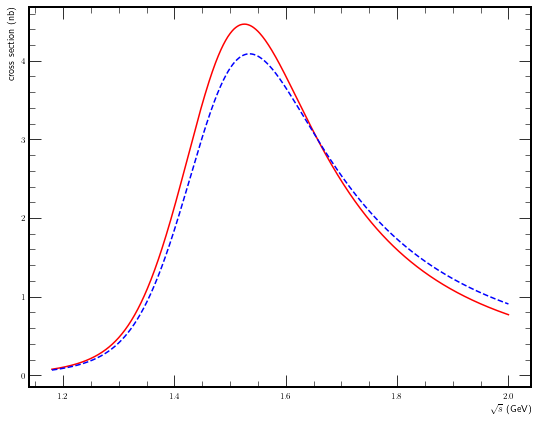

In [6]:
f, ax = plt.subplots(figsize=(9, 7))
ax.plot(vecm, vbcs, 'r-', zorder=0)
ax.plot(vecm, vvcs, 'b--', zorder=1)
ax.set_xlabel(r'$\sqrt{s}$ (GeV)')
ax.set_ylabel('cross section (nb)')